In [737]:
import numpy as np
import yfinance as yf
import matplotlib.pyplot as plt
import pandas as pd
from scipy.stats import norm, shapiro
from matplotlib import ticker
from datetime import time, datetime

In [738]:
# ADR_tickers=['BP','BTI','DEO','SHEL', 'GSK','HSBC', 'UL',   'RIO',  'RELX', 'NGG']
# EUR_tickers = ["BP.L", "BATS.L", "DGE.L", "SHEL.L","GSK.L", "HSBA.L", "ULVR.L","RIO.L","REL.L","NG.L"]

# ADR_tickers=['BP','BTI','HSBC', 'UL',   'RIO',  'RELX', 'NGG']
# EUR_tickers = ["BP.L", "BATS.L", "HSBA.L", "ULVR.L","RIO.L","REL.L","NG.L"]


In [739]:
ADR_tickers=["NVO","ASML","SHEL","AZN","NVS","TTE","HSBC","SAP","UL","BP"]
EUR_tickers=["NOVO-B.CO","AML.L","SHEL.L","AZN.L","NOVN.SW","TTE.PA","HSBA.L","SAP.DE","ULVR.L","BP.L"]

EUR_ticker_country={"NOVO-B.CO":"DEN",
                    "AML.L":"LON",
                    "SHEL.L":"LON",
                    "AZN.L":"LON",
                    "NOVN.SW":"SWI",
                    "TTE.PA":"FRA",
                    "HSBA.L":"LON",
                    "SAP.DE":"DEU",
                    "ULVR.L":"LON",
                    "BP.L":"LON"}

country_exchange={"LON":"^FTSE",
                  "DEN":"^OMXCGI",
                  "SWI":"^SSMI",
                  "FRA":"^FCHI",
                  "DEU":"^GDAXI"}

# ADR_tickers=ADR_tickers[0:2]
# EUR_tickers = EUR_tickers[0:2]

if len(ADR_tickers)==1:
    ticker_dict[ADR_tickers[0]]=EUR_tickers[0]
else:
    ticker_dict={key:value for key,value in zip(ADR_tickers,EUR_tickers)}

In [740]:
len(ADR_tickers)

10

In [741]:
START_DATE='2021-11-25'
END_DATE='2023-11-20'
INTERVAL='1h'
MORNING_OPEN= "08:00:00"
MORNING_CLOSE= "12:00:00"

In [742]:
def get_intraday_returns(ticker,start_date=START_DATE,end_date=END_DATE):
    data = yf.download(ticker, start=START_DATE, end=END_DATE)
    intraday_returns = (data['Close'] - data['Open']) / data['Open']
    intraday_returns = pd.DataFrame(intraday_returns)
    
    return intraday_returns

SP_data=get_intraday_returns("SPY")

[*********************100%%**********************]  1 of 1 completed


In [743]:
SP_data.head()

,0
Date,
2021-11-26,-0.007289
2021-11-29,0.001142
2021-11-30,-0.013939
2021-12-01,-0.024131
2021-12-02,0.014798


In [744]:
adr_data_dict={}
for ticker in ticker_dict:
    cur_data=pd.DataFrame()
    cur_data["returns"]=get_intraday_returns(ticker)-SP_data
    cur_data["Date"]=cur_data.index.date
    adr_data_dict[ticker]=cur_data

[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed


In [745]:
adr_data_dict

{'NVO':              returns        Date
 Date                            
 2021-11-26  0.002596  2021-11-26
 2021-11-29  0.006769  2021-11-29
 2021-11-30 -0.001362  2021-11-30
 2021-12-01  0.024784  2021-12-01
 2021-12-02 -0.013766  2021-12-02
 ...              ...         ...
 2023-11-13  0.011188  2023-11-13
 2023-11-14 -0.010415  2023-11-14
 2023-11-15 -0.018068  2023-11-15
 2023-11-16  0.003512  2023-11-16
 2023-11-17  0.000161  2023-11-17
 
 [498 rows x 2 columns],
 'ASML':              returns        Date
 Date                            
 2021-11-26  0.001012  2021-11-26
 2021-11-29  0.024015  2021-11-29
 2021-11-30 -0.005340  2021-11-30
 2021-12-01  0.013597  2021-12-01
 2021-12-02 -0.008501  2021-12-02
 ...              ...         ...
 2023-11-13 -0.001482  2023-11-13
 2023-11-14 -0.004273  2023-11-14
 2023-11-15 -0.002396  2023-11-15
 2023-11-16  0.003899  2023-11-16
 2023-11-17  0.006164  2023-11-17
 
 [498 rows x 2 columns],
 'SHEL':              returns        Date
 Date

In [746]:
def plot_resid(ax,resid_df,title_index):
    values=resid_df["returns"].values
    mean,std=norm.fit(values)
    ax.hist(values, bins=10, density=True, alpha=0.6, color='g')
    xmin, xmax = ax.get_xlim()
    x = np.linspace(xmin, xmax, 100)
    p = norm.pdf(x, mean, std)
    ax.plot(x, p, 'k', linewidth=2)
    ax.set_title(ADR_tickers[i])
    ax.set_xlabel("Returns")
    ax.set_ylabel("Frequency")
    

Ticker: NVO, Statistic: 0.8392462134361267, p-value: 4.764996031960611e-22
Data does not look normally distributed
Ticker: ASML, Statistic: 0.9786270260810852, p-value: 1.1093877674284158e-06
Data does not look normally distributed
Ticker: SHEL, Statistic: 0.8663498163223267, p-value: 3.1783032094763476e-20
Data does not look normally distributed
Ticker: AZN, Statistic: 0.9949879050254822, p-value: 0.10623505711555481
Data looks normally distributed
Ticker: NVS, Statistic: 0.9950013160705566, p-value: 0.1074208915233612
Data looks normally distributed
Ticker: TTE, Statistic: 0.9731281399726868, p-value: 6.365646498807109e-08
Data does not look normally distributed
Ticker: HSBC, Statistic: 0.9926096200942993, p-value: 0.014624840579926968
Data does not look normally distributed
Ticker: SAP, Statistic: 0.9681095480918884, p-value: 6.197584667688716e-09
Data does not look normally distributed
Ticker: UL, Statistic: 0.9739443063735962, p-value: 9.516593735270362e-08
Data does not look norm

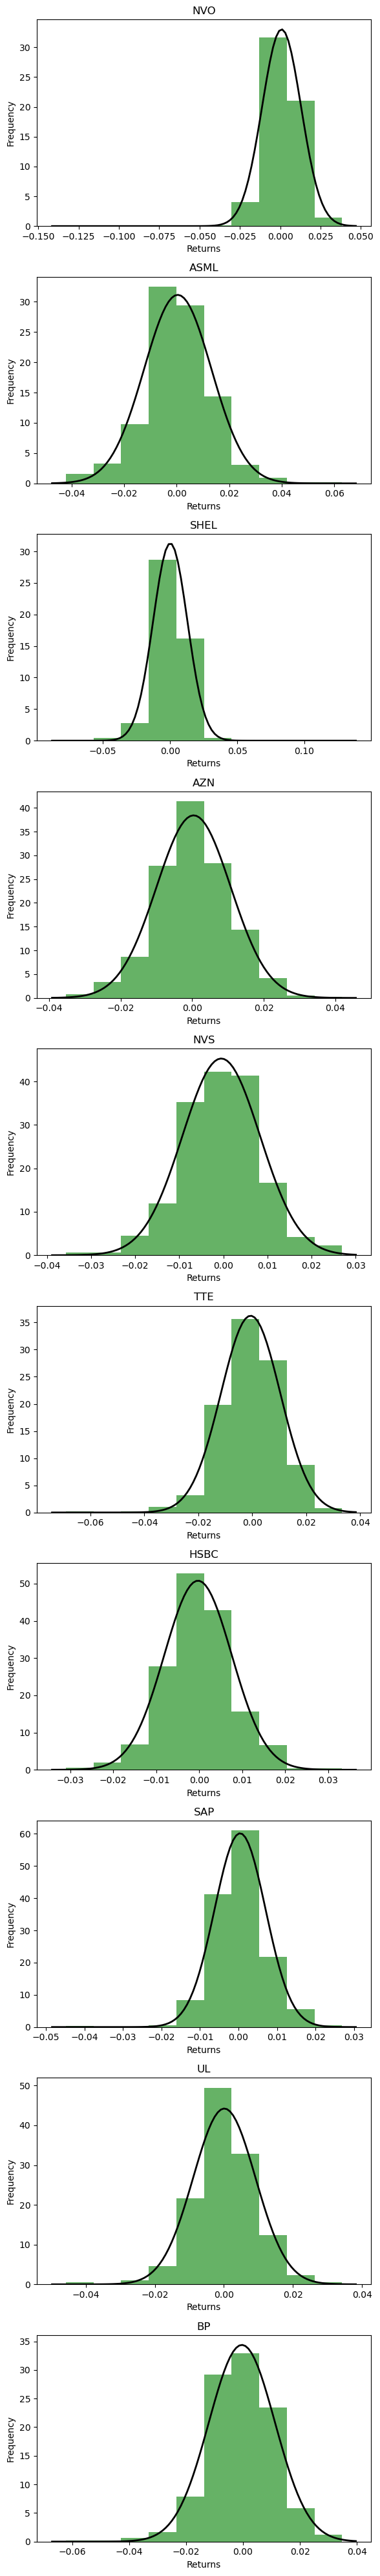

In [747]:
num_ticker=len(ticker_dict)
fig,axs=plt.subplots(nrows=num_ticker,ncols=1,figsize=(6,4*num_ticker))

i=0
for ticker in adr_data_dict:
    plot_resid(axs[i],adr_data_dict[ticker],i)
    i+=1
    stat, p_value = shapiro(adr_data_dict[ticker]["returns"])
    print(f'Ticker: {ticker}, Statistic: {stat}, p-value: {p_value}')

    if p_value > 0.05:
        print('Data looks normally distributed')
    else:
        print('Data does not look normally distributed')
    
plt.tight_layout()
plt.show()

In [748]:
def condition_data(data,lower_percentile=33,upper_percentile=66):
    #positive if >75th
    #negative if <25th
    #neutral if inbetween
    lower,upper=np.percentile(data["returns"].values,[lower_percentile,upper_percentile])
    

    positive=data[data["returns"]>upper].dropna()
    negative=data[data["returns"]<lower].dropna()
    neutral=data[(data["returns"]>=lower) & (data["returns"]<=upper)].dropna()
    
    return positive,negative,neutral

cond_df_arr=condition_data(resid_df)

In [749]:
conditioned_data={}
for ticker in adr_data_dict:
    temp_cond_arr=condition_data(adr_data_dict[ticker])
    conditioned_data[ticker]=temp_cond_arr

In [750]:
conditioned_data

{'NVO': (             returns        Date
  Date                            
  2021-11-29  0.006769  2021-11-29
  2021-12-01  0.024784  2021-12-01
  2021-12-08  0.005802  2021-12-08
  2021-12-13  0.011429  2021-12-13
  2021-12-15  0.014033  2021-12-15
  ...              ...         ...
  2023-10-24  0.009824  2023-10-24
  2023-10-27  0.005595  2023-10-27
  2023-11-06  0.012016  2023-11-06
  2023-11-07  0.006384  2023-11-07
  2023-11-13  0.011188  2023-11-13
  
  [169 rows x 2 columns],
               returns        Date
  Date                            
  2021-12-02 -0.013766  2021-12-02
  2021-12-03 -0.007519  2021-12-03
  2021-12-06 -0.009438  2021-12-06
  2021-12-14 -0.004907  2021-12-14
  2021-12-17 -0.067745  2021-12-17
  ...              ...         ...
  2023-11-01 -0.005482  2023-11-01
  2023-11-02 -0.013255  2023-11-02
  2023-11-03 -0.008747  2023-11-03
  2023-11-14 -0.010415  2023-11-14
  2023-11-15 -0.018068  2023-11-15
  
  [165 rows x 2 columns],
               returns   

In [751]:
#Need to find the cumulative specifc returns in the European morning session

FT_data=yf.download("^FTLC",START_DATE,END_DATE,interval="1h")["Close"]
FT_data=FT_data.between_time(MORNING_OPEN,MORNING_CLOSE)
FT_data=pd.DataFrame(FT_data)


def get_eur_market_returns(ticker,start_date=START_DATE,end_date=END_DATE,interval="1h"):
    data=yf.download(ticker,start_date,end_date,interval="1h")
    out_df=pd.DataFrame()
    out_df["Close"]=data["Close"]
    data=data.between_time(MORNING_OPEN,MORNING_CLOSE)
    
    return out_df

eur_market_dict={}
for country in country_exchange:
    eur_market_dict[country_exchange[country]]=get_eur_market_returns(country_exchange[country])


def get_eur_spec_returns(ticker,start_date=START_DATE,end_date=END_DATE,interval="1h"):
    data=yf.download(ticker,start_date,end_date,interval="1h")
    data=data.between_time(MORNING_OPEN,MORNING_CLOSE)
    out_df=pd.DataFrame()
    out_df["raw_returns"]=data["Close"]
    out_df["Date"]=data.index.date
    
    
    #out_df["raw_returns"]=out_df["raw_returns"]-FT_data["Close"]
    out_df["raw_returns"]=out_df["raw_returns"]-eur_market_dict[country_exchange[EUR_ticker_country[ticker]]]["Close"]

    
    
    return out_df.dropna()

eur_data_dict={}
for ticker in EUR_tickers:
    eur_data_dict[ticker]=get_eur_spec_returns(ticker)
    

[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%*******

In [752]:
eur_market_dict

{'^FTSE':                                  Close
 Datetime                              
 2021-11-25 08:00:00+00:00  7295.169922
 2021-11-25 09:00:00+00:00  7299.560059
 2021-11-25 10:00:00+00:00  7299.839844
 2021-11-25 11:00:00+00:00  7297.240234
 2021-11-25 12:00:00+00:00  7301.220215
 ...                                ...
 2023-11-17 12:00:00+00:00  7465.209961
 2023-11-17 13:00:00+00:00  7486.439941
 2023-11-17 14:00:00+00:00  7487.520020
 2023-11-17 15:00:00+00:00  7504.000000
 2023-11-17 16:00:00+00:00  7502.000000
 
 [4466 rows x 1 columns],
 '^OMXCGI':                                  Close
 Datetime                              
 2021-11-25 09:00:00+01:00  2532.133545
 2021-11-25 10:00:00+01:00  2533.660645
 2021-11-25 11:00:00+01:00  2518.209961
 2021-11-25 12:00:00+01:00  2523.317871
 2021-11-25 13:00:00+01:00  2531.759277
 ...                                ...
 2023-11-17 13:00:00+01:00  2900.998291
 2023-11-17 14:00:00+01:00  2906.515381
 2023-11-17 15:00:00+01:00  2898

In [753]:
eur_data_dict

{'NOVO-B.CO':                            raw_returns        Date
 Datetime                                          
 2021-11-25 09:00:00+01:00 -2168.833557  2021-11-25
 2021-11-25 10:00:00+01:00 -2170.660645  2021-11-25
 2021-11-25 11:00:00+01:00 -2158.859955  2021-11-25
 2021-11-25 12:00:00+01:00 -2163.417877  2021-11-25
 2021-11-26 09:00:00+01:00 -2144.972168  2021-11-26
 ...                                ...         ...
 2023-11-16 12:00:00+01:00 -2175.414185  2023-11-16
 2023-11-17 09:00:00+01:00 -2204.980591  2023-11-17
 2023-11-17 10:00:00+01:00 -2207.687744  2023-11-17
 2023-11-17 11:00:00+01:00 -2207.989319  2023-11-17
 2023-11-17 12:00:00+01:00 -2206.142578  2023-11-17
 
 [1972 rows x 2 columns],
 'AML.L':                            raw_returns        Date
 Datetime                                          
 2021-11-25 08:00:00+00:00 -5761.213745  2021-11-25
 2021-11-25 09:00:00+00:00 -5750.310059  2021-11-25
 2021-11-25 10:00:00+00:00 -5752.339844  2021-11-25
 2021-11-25 11

In [754]:
def condition_euro_data(data,cond_df_arr):
    
    positive_df,negative_df,neutral_df=cond_df_arr
    
    data=time_elapsed(data)
    eur_pos_df=data[data["Date"].isin(positive_df["Date"])]
    eur_neg_df=data[data["Date"].isin(negative_df["Date"])]
    eur_neu_df=data[data["Date"].isin(neutral_df["Date"])]
    
    eur_pos_df=cum_return(eur_pos_df)
    eur_neg_df=cum_return(eur_neg_df)
    eur_neu_df=cum_return(eur_neu_df)
    
    return eur_pos_df,eur_neg_df,eur_neu_df

def time_elapsed(data):
    
    subtract_time=time(8,0)
    out_df=data.copy()
    out_df["time"]=data.index.time
    out_df["elapsed"]=out_df["time"].apply(lambda x: datetime.combine(datetime.today(), x) - datetime.combine(datetime.today(), subtract_time)).dt.total_seconds() / 3600
        
    return out_df

def cum_return(data):
    
    times=data["elapsed"]
    #data=data.groupby('Date',as_index=False)['raw_returns'].pct_change().add(1).cumprod()-1
    data=data.groupby('Date')['raw_returns'].pct_change()+1
    data=data.groupby(data.index.date).cumprod()
    data=pd.DataFrame(data)
    data["elapsed"]=times
    data.columns=["cum_returns","elapsed"]
   
    return data.dropna()



In [755]:
#pos_df,neg_df,neu_df=condition_euro_data(eur_df,cond_df_arr)

In [756]:
positive_dict={}
negative_dict={}
neutral_dict={}

for adr,eur in zip(conditioned_data,eur_data_dict):
    positive_dict[adr],negative_dict[adr],neutral_dict[adr]=condition_euro_data(eur_data_dict[eur],conditioned_data[adr])
    
positive_df=pd.concat(positive_dict.values(),ignore_index=True)
negative_df=pd.concat(negative_dict.values(),ignore_index=True)
neutral_df=pd.concat(neutral_dict.values(),ignore_index=True)

In [757]:
def plot_expcum_time(data,title):
    average=data.groupby("elapsed")["cum_returns"].mean().reset_index()
    plt.plot(average['elapsed'], average['cum_returns'], marker='o',linestyle="")
    plt.xlabel('Elapsed Time Since Market Open (hours)')
    plt.xticks([1,2,3,4])
    plt.ylabel('Cumulative Returns')
    plt.title(title+' Cumulative Returns Over Time')
    plt.show()

# def subplot_expcum_time(data):
#     n=len(ADR_tickers)
    
#     fig,axs=

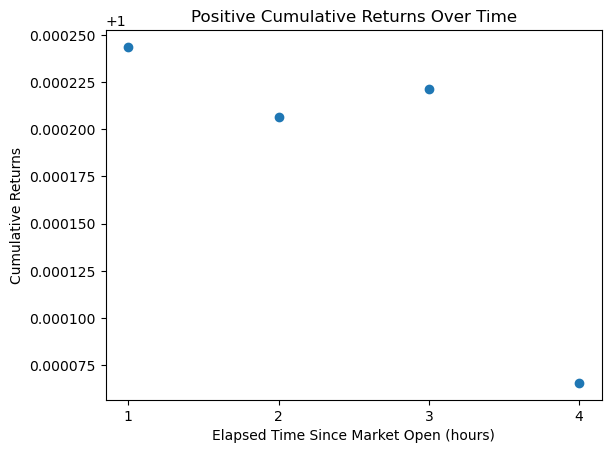

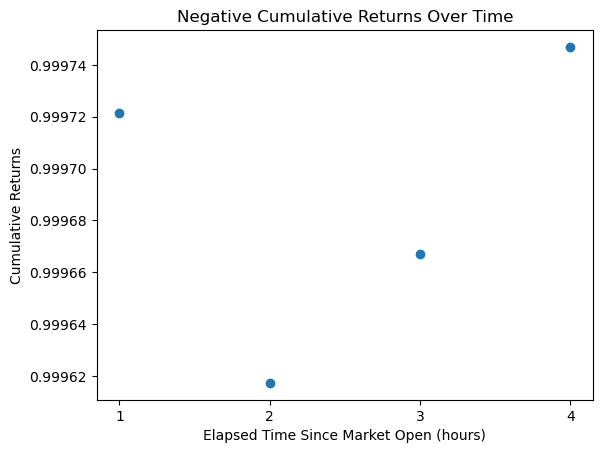

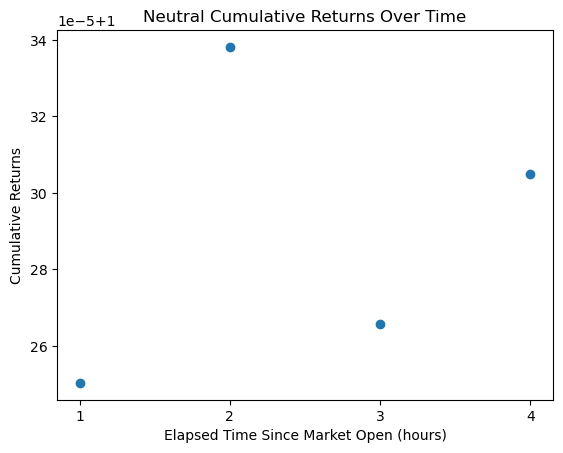

In [758]:
for i,t in zip([positive_df,negative_df,neutral_df],["Positive","Negative","Neutral"]):
    plot_expcum_time(i,t)

In [759]:
def add_headers(
    fig,
    *,
    row_headers=None,
    col_headers=None,
    row_pad=1,
    col_pad=5,
    rotate_row_headers=True
):
    # Based on https://stackoverflow.com/a/25814386

    axes = fig.get_axes()

    for ax in axes:
        sbs = ax.get_subplotspec()

        # Putting headers on cols
        if (col_headers is not None) and sbs.is_first_row():
            ax.annotate(
                col_headers[sbs.colspan.start],
                xy=(0.5, 1),
                xytext=(0, col_pad),
                xycoords="axes fraction",
                textcoords="offset points",
                ha="center",
                va="baseline"                
            )

        # Putting headers on rows
        if (row_headers is not None) and sbs.is_first_col():
            ax.annotate(
                row_headers[sbs.rowspan.start],
                xy=(0, 0.5),
                xytext=(-ax.yaxis.labelpad - row_pad, 0),
                xycoords=ax.yaxis.label,
                textcoords="offset points",
                ha="right",
                va="center",
                rotation=rotate_row_headers * 90
            )
            
row_headers=ADR_tickers
col_headers=["Positive","Negative","Neutral"]

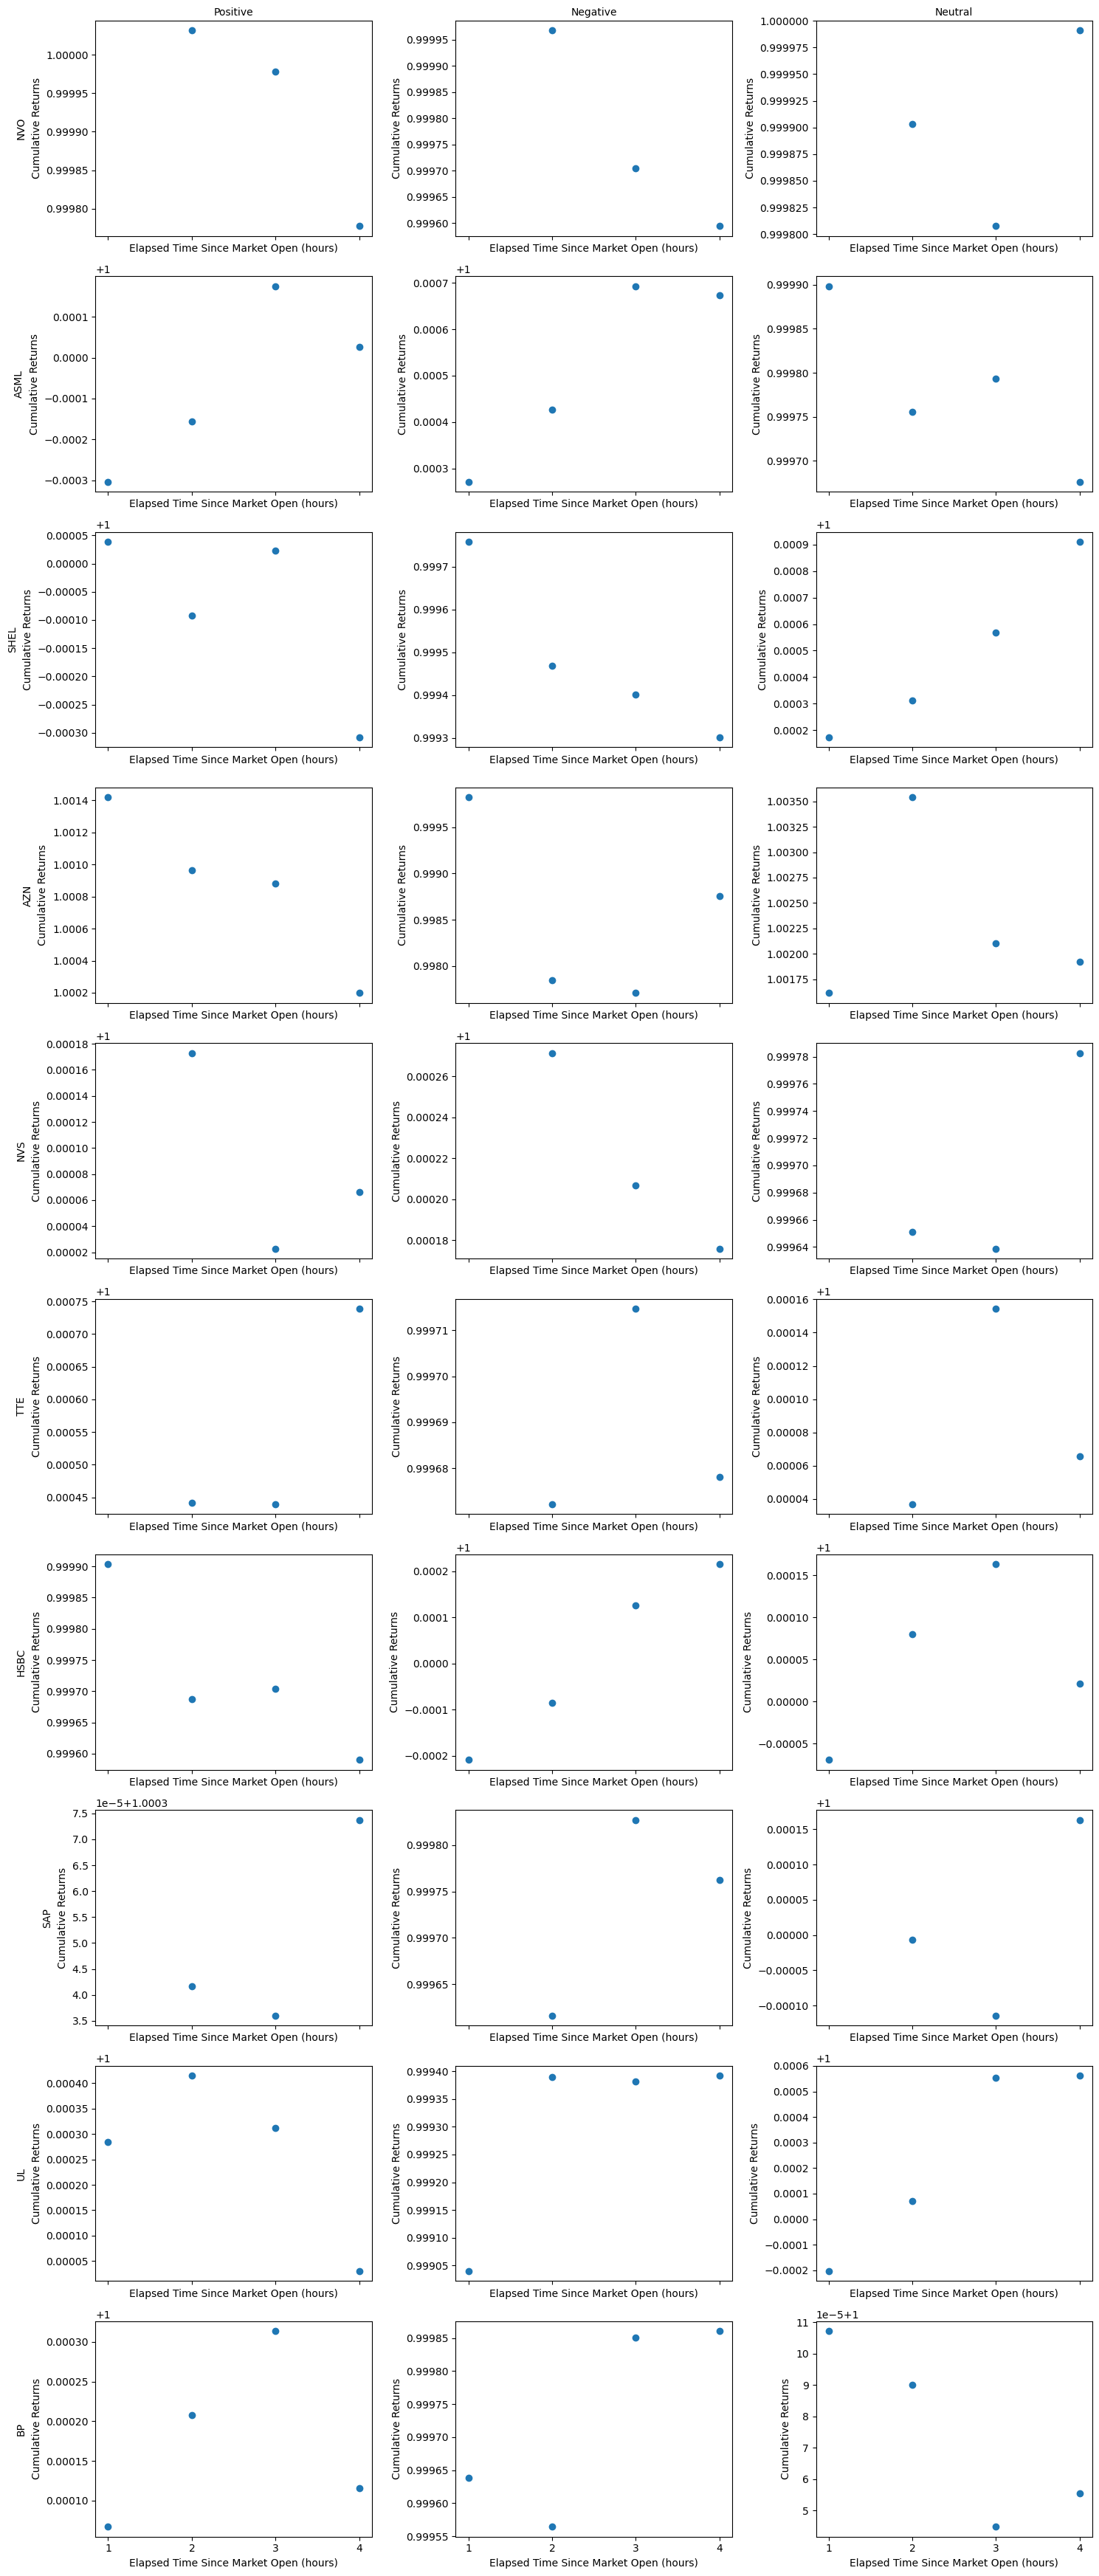

In [760]:
def subplot_resid(ax,data,title):
    average=data.groupby("elapsed")["cum_returns"].mean().reset_index()
    ax.plot(average['elapsed'].values, average['cum_returns'].values, marker='o',linestyle="")
    ax.set_xlabel('Elapsed Time Since Market Open (hours)')
    ax.set_xticks([1,2,3,4])
    ax.set_ylabel('Cumulative Returns')
    #ax.set_title(title+' Cumulative Returns Over Time')

def rank_subplot_resid(ax,data,title):
    rank=data
    data["ranks"]=data.groupby(data.index.date)["cum_returns"].rank()
    average=data.groupby("elapsed")["ranks"].mean().reset_index()
    ax.plot(average['elapsed'].values, average['ranks'].values, marker='o',linestyle="")
    ax.set_xlabel('Elapsed Time Since Market Open (hours)')
    ax.set_xticks([1,2,3,4])
    ax.set_ylabel('Cumulative Ranked Returns')

    
n=len(ADR_tickers)
fig,axs=plt.subplots(nrows=n,ncols=3,figsize=(15,3.5*n),sharex=True)
axs=axs.flatten()

i=0
for ticker in ADR_tickers:
    for cond,t in zip([positive_dict,negative_dict,neutral_dict],["Positive","Negative","Neutral"]):
        subplot_resid(axs[i],cond[ticker],t)
        i+=1
    
add_headers(fig, col_headers=col_headers, row_headers=row_headers)
plt.tight_layout()
plt.show()

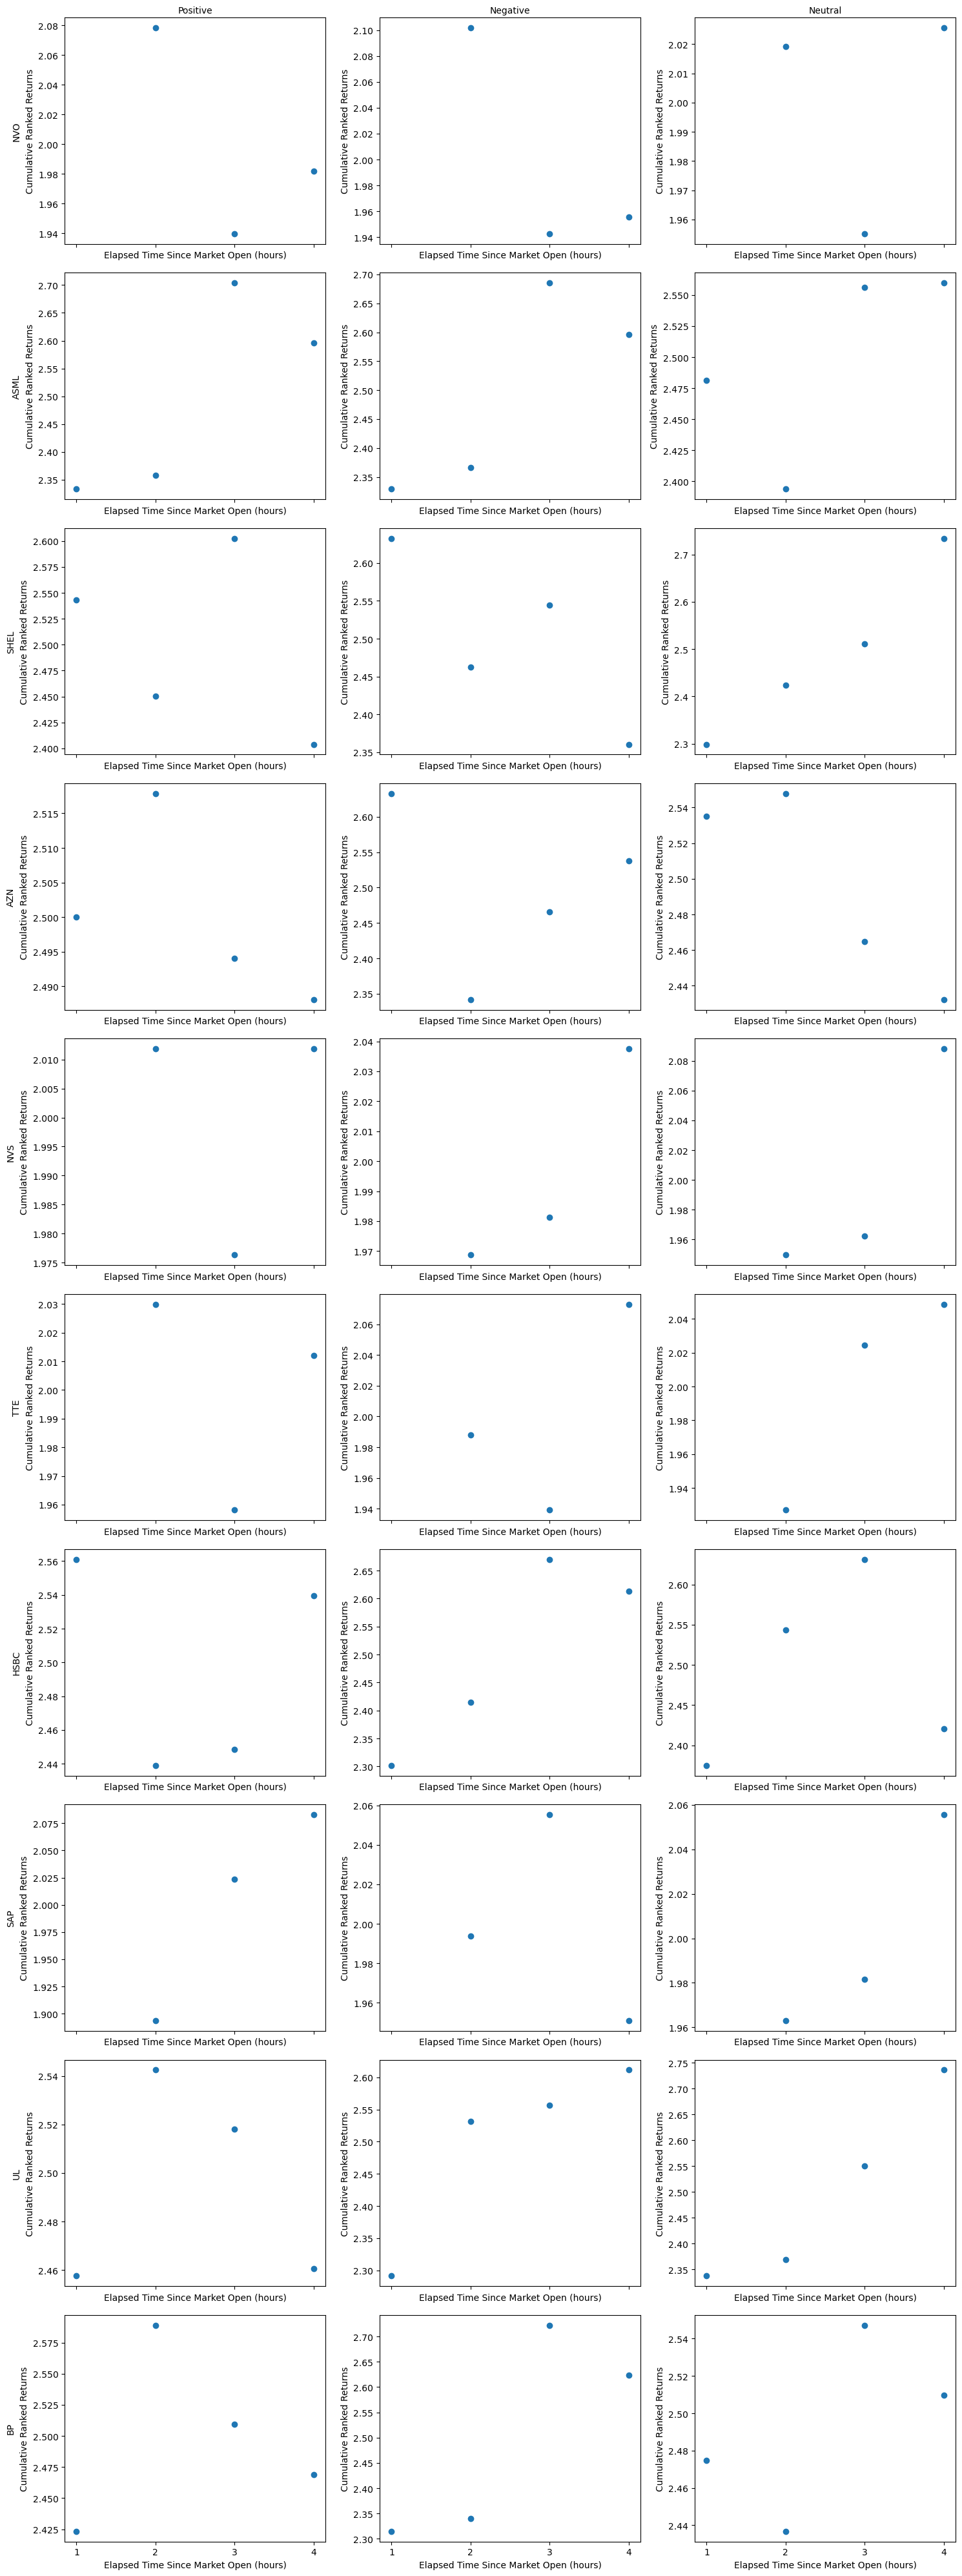

In [761]:
n=len(ADR_tickers)
fig,axs=plt.subplots(nrows=n,ncols=3,figsize=(15,4*n),sharex=True)
axs=axs.flatten()

i=0
for ticker in ADR_tickers:
    for cond,t in zip([positive_dict,negative_dict,neutral_dict],["Positive","Negative","Neutral"]):
        rank_subplot_resid(axs[i],cond[ticker],t)
        i+=1
    
add_headers(fig, col_head ers=col_headers, row_headers=row_headers)
plt.tight_layout()
plt.show()